Name: Aditya Gupte

Institute: IIT Gandhinagar

Date: May 6, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df1 = pd.read_csv('Microsoft_Stock.csv') # Kaggle dataset
print(df1.head(), df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB
                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438 None


In [3]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.3.3


In [4]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
print(LSTM, Dense)

<class 'keras.src.layers.rnn.lstm.LSTM'> <class 'keras.src.layers.core.dense.Dense'>


In [6]:
df1.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [7]:
data = pd.read_csv('Microsoft_Stock.csv', parse_dates=['Date'], index_col='Date')
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])
# Sort by 'Date' in ascending order
df1.sort_values('Date', inplace=True)
df1.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


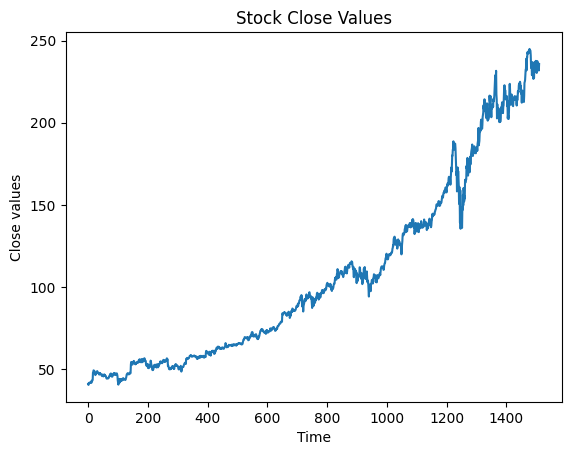

In [9]:
plt.plot(df1['Close'])
plt.xlabel("Time")
plt.ylabel('Close values')
plt.title("Stock Close Values")
plt.show()

In [10]:
# Normalize the 'Close' column (assuming 'Close' is the target variable)
scaler = MinMaxScaler()
df1['Close_scaled'] = scaler.fit_transform(df1[['Close']])

# Define the sequence length (e.g., 10 days)
seq_length = 10

# Create sequences of input-output pairs
X, y = [], []
for i in range(len(df1) - seq_length):
    X.append(df1['Close_scaled'].iloc[i:i+seq_length].values)
    y.append(df1['Close_scaled'].iloc[i+seq_length])

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], seq_length, 1)

# Split the df1 into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(df1))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1208, 10, 1)
y_train shape: (1208,)
X_test shape: (293, 10, 1)
y_test shape: (293,)


In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

c:\Users\Aditya Gupte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0303
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8945e-04
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1163e-04
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.5601e-05
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.2026e-05
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4269e-05
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6239e-05
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9652e-05
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7570e-05
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8927e-05
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.4795e-05
Epoch 13/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2764e-05
Epoch 14/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8799e-05
Epoch 15/25
38/38 ━━━━━━━━━━━━━━━━━━

In [12]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024  
Test Loss: 0.003269668435677886


In [13]:
# Forecast future values
forecast = []
inputs = df1['Close_scaled'].values[-seq_length:].reshape(1, seq_length, 1)
for _ in range(30):  # Forecast 30 future values
    pred = model.predict(inputs)[0][0]
    forecast.append(pred)
    inputs = np.append(inputs[:, 1:, :], [[pred]], axis=1)

# Inverse scale the forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
forecast = []
inputs = df1['Close_scaled'].values[-seq_length:].reshape(1, seq_length, 1)
for _ in range(30):  # Forecast 30 future values
    pred = model.predict(inputs)[0][0]
    forecast.append(pred)
    inputs = np.append(inputs[:, 1:, :], [[pred]], axis=1)

# Inverse scale the forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
# Making predictions (forecast future values)
n_future = 30  # number of future predictions
last_sequence = X_test[-1:]  # take the last sequence from the test set for seed
future_inputs = last_sequence.copy()

predicted = []  # to store the predictions

for _ in range(n_future):
    # Predict using the last sequence
    current_pred = model.predict(future_inputs)[0][0]
    predicted.append(current_pred)
    
    # Update the sequence of inputs to include the new prediction
    future_inputs = np.append(future_inputs[:, 1:, :], [[current_pred]], axis=1)

# Scale back the predicted values to the original scale
forecast_scaled = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
# Generate predictions for the next 50 time steps
X_input = X_train[-1, :, :]  # Get the last sequence from the test set
n=len(X_test)
X_input = X_input.reshape(1, X_input.shape[0], X_input.shape[1])  # Reshape for input

future_predictions_scaled = []
for _ in range(n):
    # Make a prediction for the next time step
    prediction = model.predict(X_input)
    future_predictions_scaled.append(prediction[0, 0])

    # Update the input sequence with the predicted value
    X_input = np.roll(X_input, -1, axis=1)
    X_input[0, -1, 0] = prediction[0, 0]

future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1)).reshape(1, -1)[0]
print("Future predictions:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

In [ ]:
# Combine the original data and predictions
original_data = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]
combined_data = np.concatenate((original_data, future_predictions))
len(future_predictions)

293

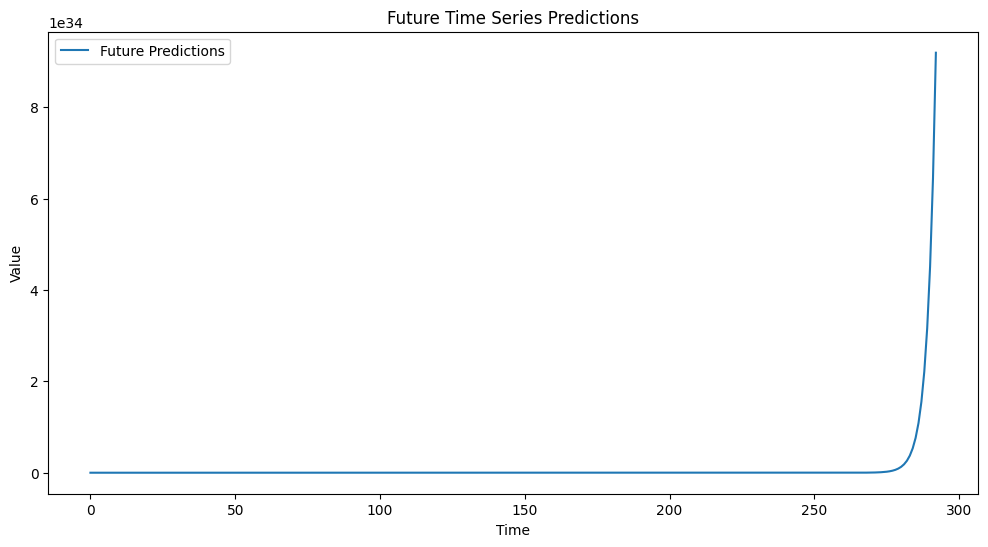

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(future_predictions)), future_predictions, label='Future Predictions')
plt.title('Future Time Series Predictions')
plt.xlabel('Time')
plt.ylabel('Value')

plt.legend()
plt.show()

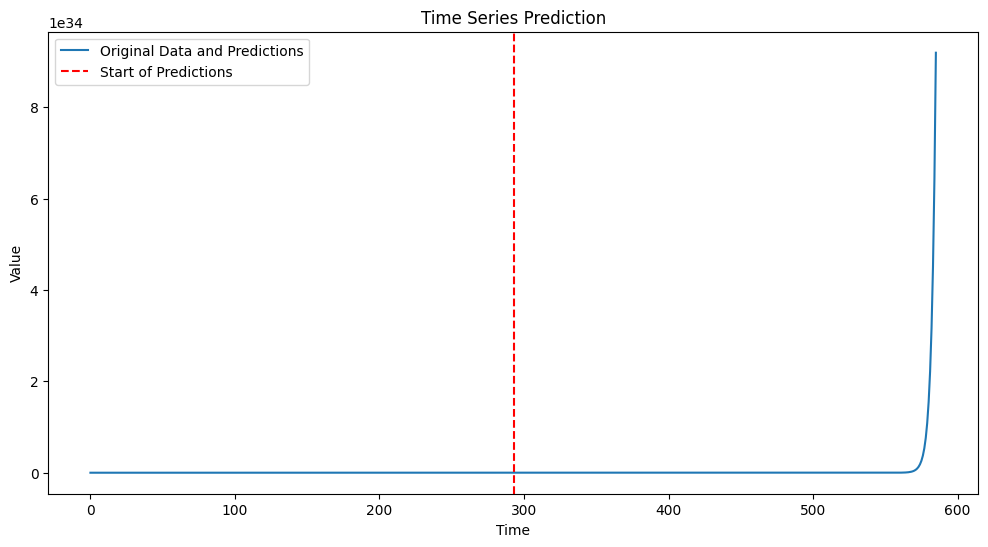

In [ ]:
# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(combined_data)), combined_data, label='Original Data and Predictions')
plt.axvline(x=len(original_data), color='r', linestyle='--', label='Start of Predictions')
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

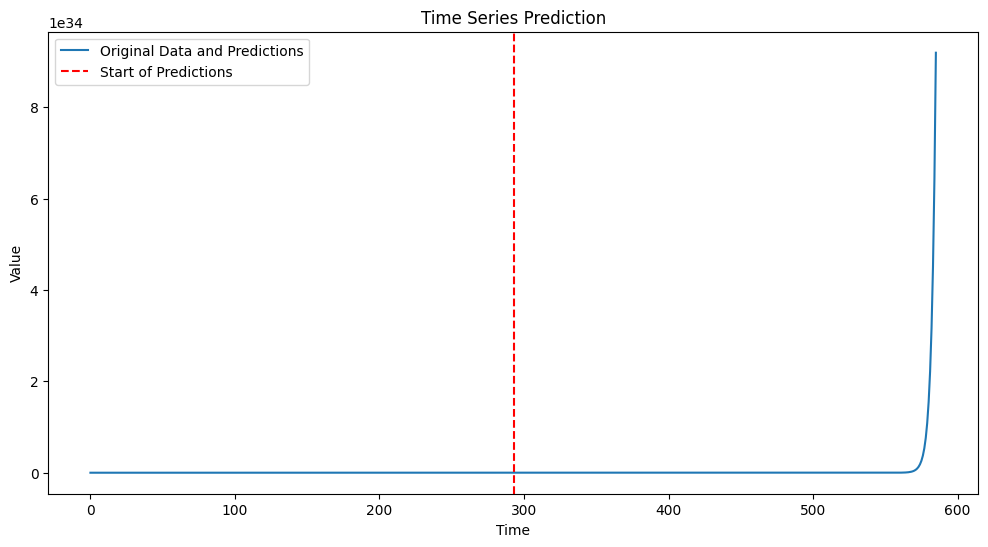

In [ ]:
# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(combined_data)), combined_data, label='Original Data and Predictions')
plt.axvline(x=len(y_test), color='r', linestyle='--', label='Start of Predictions')
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Trying to predict the test dataset

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


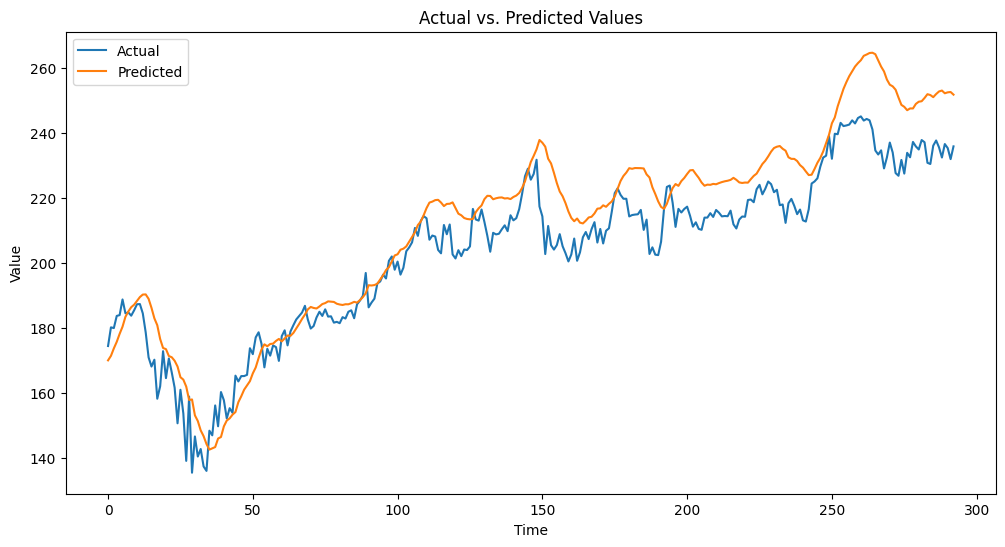

In [16]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred) # To get values in proper range again.
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0] # Converted to 1-d array for plotting.

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_scaled)), y_test_scaled, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()